In [2]:
import pandas as pd
from scipy.stats import norm
class Dataset(object):

    def __init__(self, language):
        self.language = language

        trainset_path = "../datasets/{}/{}_Train.tsv".format(language, language.capitalize())
        devset_path = "../datasets/{}/{}_Dev.tsv".format(language, language.capitalize())

        self.trainset = self.read_dataset(trainset_path)
        self.devset = self.read_dataset(devset_path)

    def read_dataset(self, file_path):
        with open(file_path) as file:
            fieldnames = ['hit_id', 'sentence', 'start_offset', 'end_offset', 'target_word', 'native_annots',
                          'nonnative_annots', 'native_complex', 'nonnative_complex', 'gold_label', 'gold_prob']
            
            dataset = pd.read_csv(file, names = fieldnames, sep = "\t")
        return dataset

In [3]:
class EDA(object):
    def __init__(self, language):
        self.data = Dataset(language).trainset[['sentence', 'target_word', 'gold_label']]
        
        if language == 'english':
            self.avg_word_length = 5.3
        else:  # spanish
            self.avg_word_length = 6.2
        
    

In [4]:
EN = Dataset('english').trainset[['sentence', 'target_word', 'gold_label']]
ES = Dataset('spanish').trainset[['sentence', 'target_word', 'gold_label']]

EN_av_word_length = 5.3
ES_av_word_length = 6.2
len_EN = EN.shape[0]
len_ES = ES.shape[0]

[Text(0.5,0,'Sentence Length')]

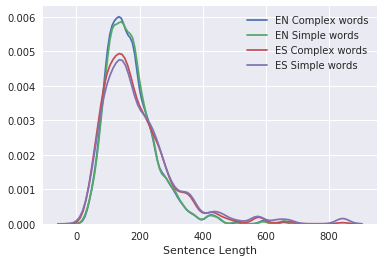

In [6]:
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

EN['sentence_length'] = EN['sentence'].apply(lambda x: len(x))
s1 = EN.loc[EN['gold_label'] == 1]['sentence_length']
s2 = EN.loc[EN['gold_label'] == 0]['sentence_length']

fig = sns.kdeplot(s1, label = 'EN Complex words')
fig = sns.kdeplot(s2, label = 'EN Simple words')

ES['sentence_length'] = ES['sentence'].apply(lambda x: len(x))
s3 = ES.loc[ES['gold_label'] == 1]['sentence_length']
s4 = ES.loc[ES['gold_label'] == 0]['sentence_length']

fig = sns.kdeplot(s3, label = 'ES Complex words')
fig = sns.kdeplot(s4, label = 'ES Simple words')
fig.set(xlabel = "Sentence Length")

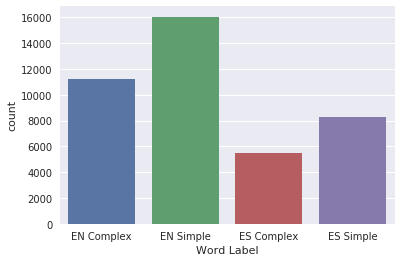

In [139]:
EN['word_length']= EN['target_word'].apply(lambda x: len(x))
df = EN['gold_label'].apply(lambda x: "EN Simple" if x == 0 else "EN Complex")
df2 = ES['gold_label'].apply(lambda x: "ES Simple" if x == 0 else "ES Complex")

s1 = pd.concat([df,df2])
fig = sns.countplot(s1, orient = "h")
#fig = sns.distplot(s2, label = 'EN Simple words', )


fig.set(xlabel = "Word Label")
fig.get_figure().savefig("word_label_count.png")

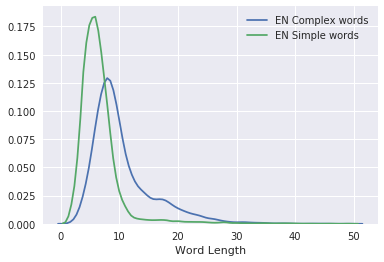

In [8]:
EN['word_length']= EN['target_word'].apply(lambda x: len(x))
s1 = EN.loc[EN['gold_label'] == 1]['word_length']
s2 = EN.loc[EN['gold_label'] == 0]['word_length']

fig = sns.kdeplot(s1, label = 'EN Complex words',)
fig = sns.kdeplot(s2, label = 'EN Simple words', )


fig.set(xlabel = "Word Length")
fig.get_figure().savefig("word_length.png")

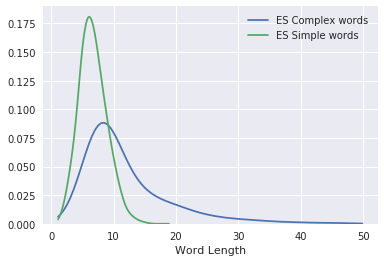

In [6]:
ES['word_length'] = ES['target_word'].apply(lambda x: len(x))
s3 = ES.loc[ES['gold_label'] == 1]['word_length']
s4 = ES.loc[ES['gold_label'] == 0]['word_length']

fig = sns.kdeplot(s3, label = 'ES Complex words', bw = 0.3)
fig = sns.kdeplot(s4, label = 'ES Simple words',bw = 0.3)

fig.set(xlabel = "Word Length")
fig.legend()

[Text(0.5,0,'Phrase Length')]

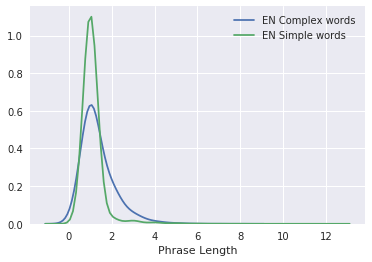

In [7]:
EN['tokens']= EN['target_word'].apply(lambda x: len(x.split()))
s1 = EN.loc[EN['gold_label'] == 1]['tokens']
s2 = EN.loc[EN['gold_label'] == 0]['tokens']

fig = sns.kdeplot(s1, label = 'EN Complex words', bw = 0.7)
fig = sns.kdeplot(s2, label = 'EN Simple words', bw = 0.7)


fig.set(xlabel = "Phrase Length")

/home/dan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


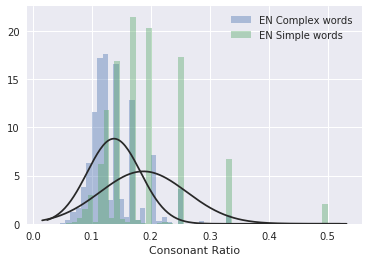

In [33]:

EN['const']= EN['target_word'].apply(lambda x: len([letter for letter in x.split() if letter not in set("aeiou")])/len(x))
s1 = EN.loc[EN['gold_label'] == 1]['const']
s2 = EN.loc[EN['gold_label'] == 0]['const']

fig = sns.distplot(s1, label = 'EN Complex words', fit = norm, kde = False, norm_hist = True)
fig = sns.distplot(s2, label = 'EN Simple words', fit = norm, kde = False, norm_hist = True)


fig.set(xlabel = "Consonant Ratio")
fig.legend()

/home/dan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,0,'Unique Letter Ratio')]

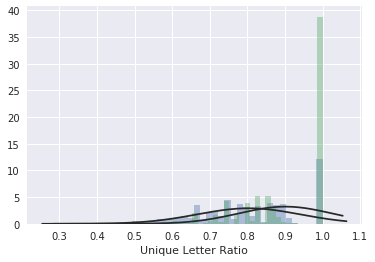

In [34]:
EN['uniq']= EN['target_word'].apply(lambda x: len(set(x))/len(x))
s1 = EN.loc[EN['gold_label'] == 1]['uniq']
s2 = EN.loc[EN['gold_label'] == 0]['uniq']


fig = sns.distplot(s1, label = 'EN Complex words', fit = norm, kde = False, norm_hist = True)
fig = sns.distplot(s2, label = 'EN Simple words', fit = norm, kde = False, norm_hist = True)


fig.set(xlabel = "Unique Letter Ratio")

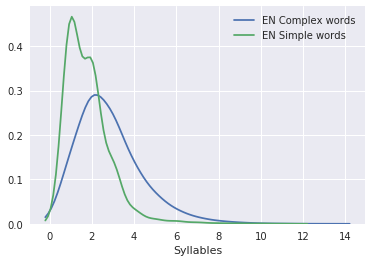

In [7]:
import pyphen
d = pyphen.Pyphen(lang='en')

EN['syl']= EN['target_word'].apply(lambda x: len(d.inserted(x).split("-")))
s1 = EN.loc[EN['gold_label'] == 1]['syl']
s2 = EN.loc[EN['gold_label'] == 0]['syl']

fig = sns.kdeplot(s1, label = 'EN Complex words', bw = 0.4)
fig = sns.kdeplot(s2, label = 'EN Simple words', bw = 0.4)

fig.set(xlabel = "Syllables")
fig.legend()
fig.get_figure().savefig("syllables.png")

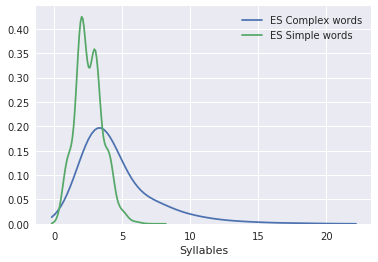

In [68]:
ES['syl']= ES['target_word'].apply(lambda x: len(d_es.inserted(x).split("-")))
s1 = ES.loc[ES['gold_label'] == 1]['syl']
s2 = ES.loc[ES['gold_label'] == 0]['syl']

fig = sns.kdeplot(s1, label = 'ES Complex words', bw = 0.4)
fig = sns.kdeplot(s2, label = 'ES Simple words', bw = 0.4)

fig.set(xlabel = "Syllables")
fig.legend()

In [51]:
d_es = pyphen.Pyphen(lang = 'es')

In [52]:
d_es.inserted("hola")

'ho-la'